### Notebook for the manual annotation of cell states and excluding stromal

- **Developed by:** Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius-Maximilian-Universität Würzburg**
- v231127

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

#from SCCAF import SCCAF_assessment, plot_roc

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
appnope             0.1.4
asttokens           NA
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.1
decorator           5.1.1
executing           2.0.1
h5py                3.11.0
igraph              0.11.6
ipykernel           6.29.5
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.42.0
matplotlib          3.8.4
mpl_toolkits        NA
natsort             8.4.0
numba               0.59.1
numpy               1.26.4
packaging           24.0
pandas              2.2.2
parso               0.8.4
patsy               0.5.6
platformdirs        4.2.1
prompt_toolkit      3.0.43
psutil              5.9.8
pure_eval           0.2.2
pydev_ipython       NA
pydevconsole        NA
pydevd          

### Read in Healthy-CTRL dataset

In [3]:
adata = sc.read_h5ad('/Users/cartalop/github/hofmann_macro/data/heart_mm_nuclei-23-0092_CMC_states_ctl240131.raw.h5ad') 
adata

AnnData object with n_obs × n_vars = 8257 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Visualise manifold with `scANVI` annotation

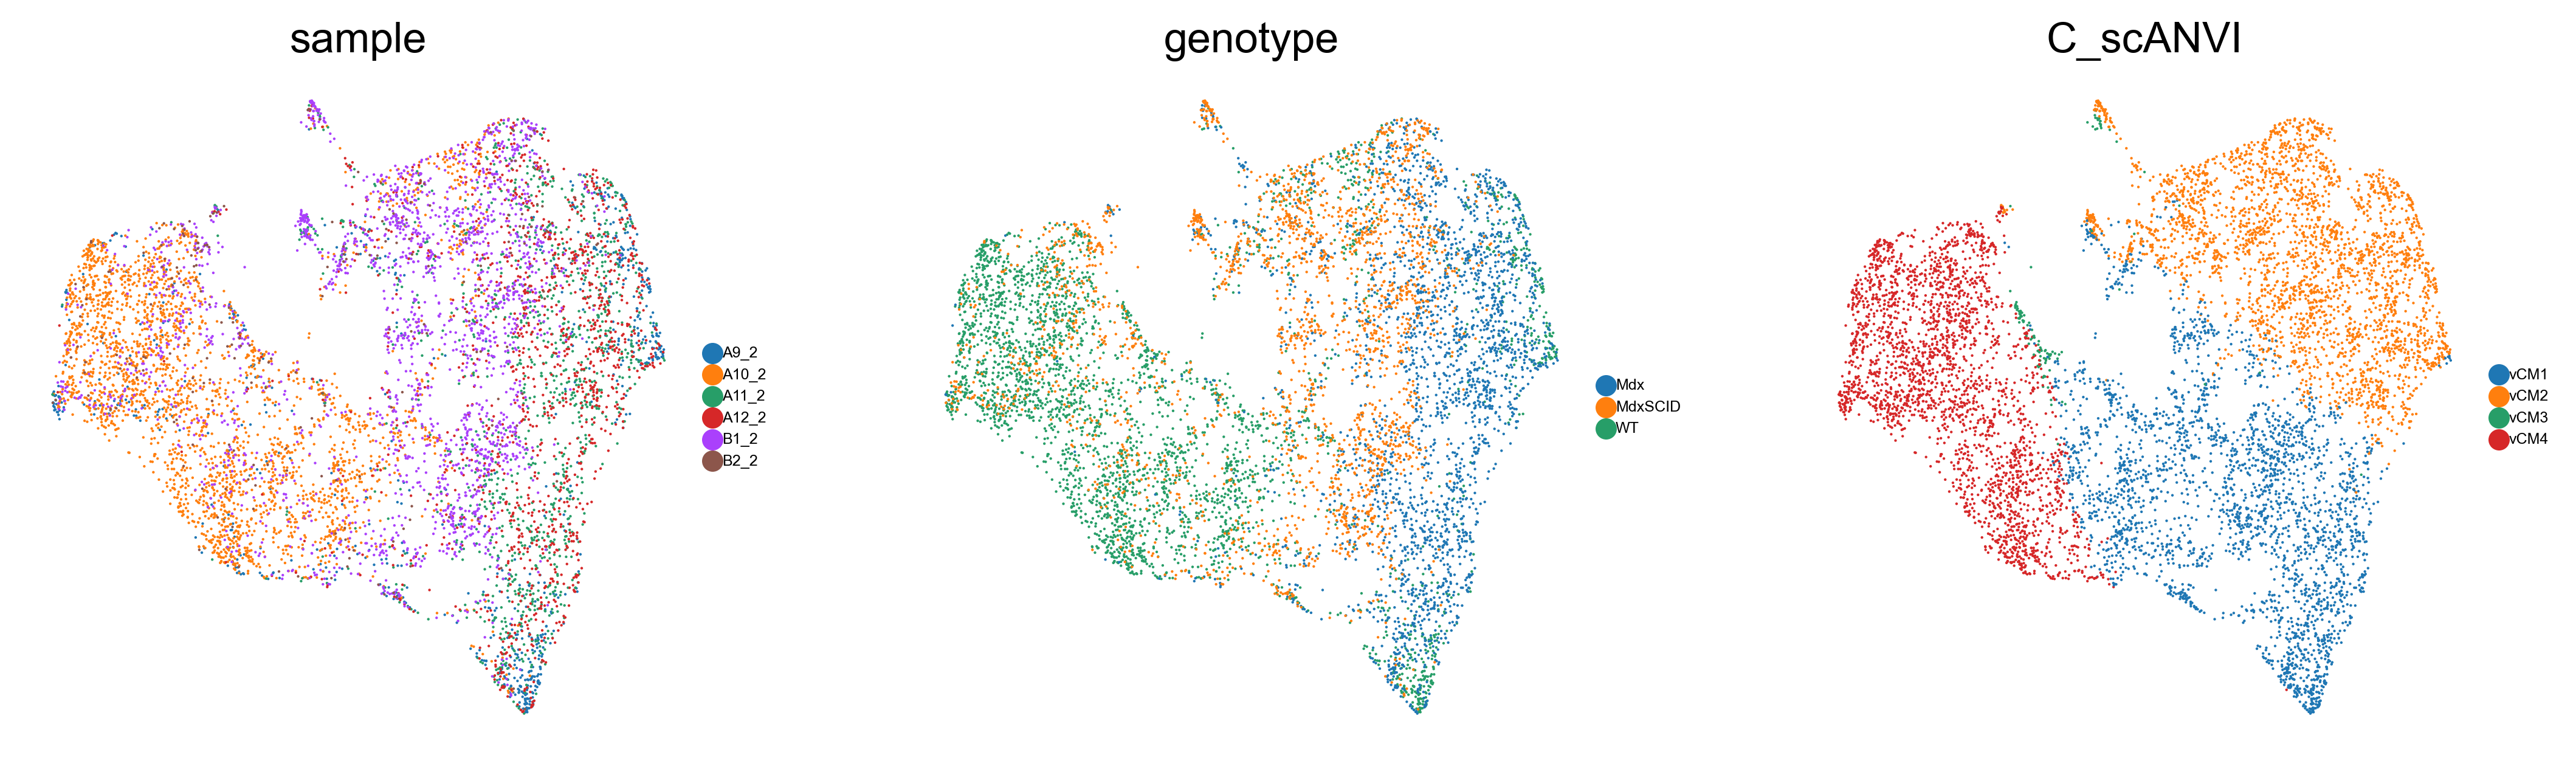

In [4]:
sc.pl.umap(adata, frameon = False, color = ['sample', 'genotype', 'C_scANVI'], size = 3, legend_fontsize = 5, ncols = 3)

### Cluster manifold using `leiden` with resolution of `1.0`

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
running Leiden clustering


/var/folders/lg/x_40326938n7b_ybcxybstf00000gn/T/ipykernel_68030/1782459585.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.4, random_state = 1712)


    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


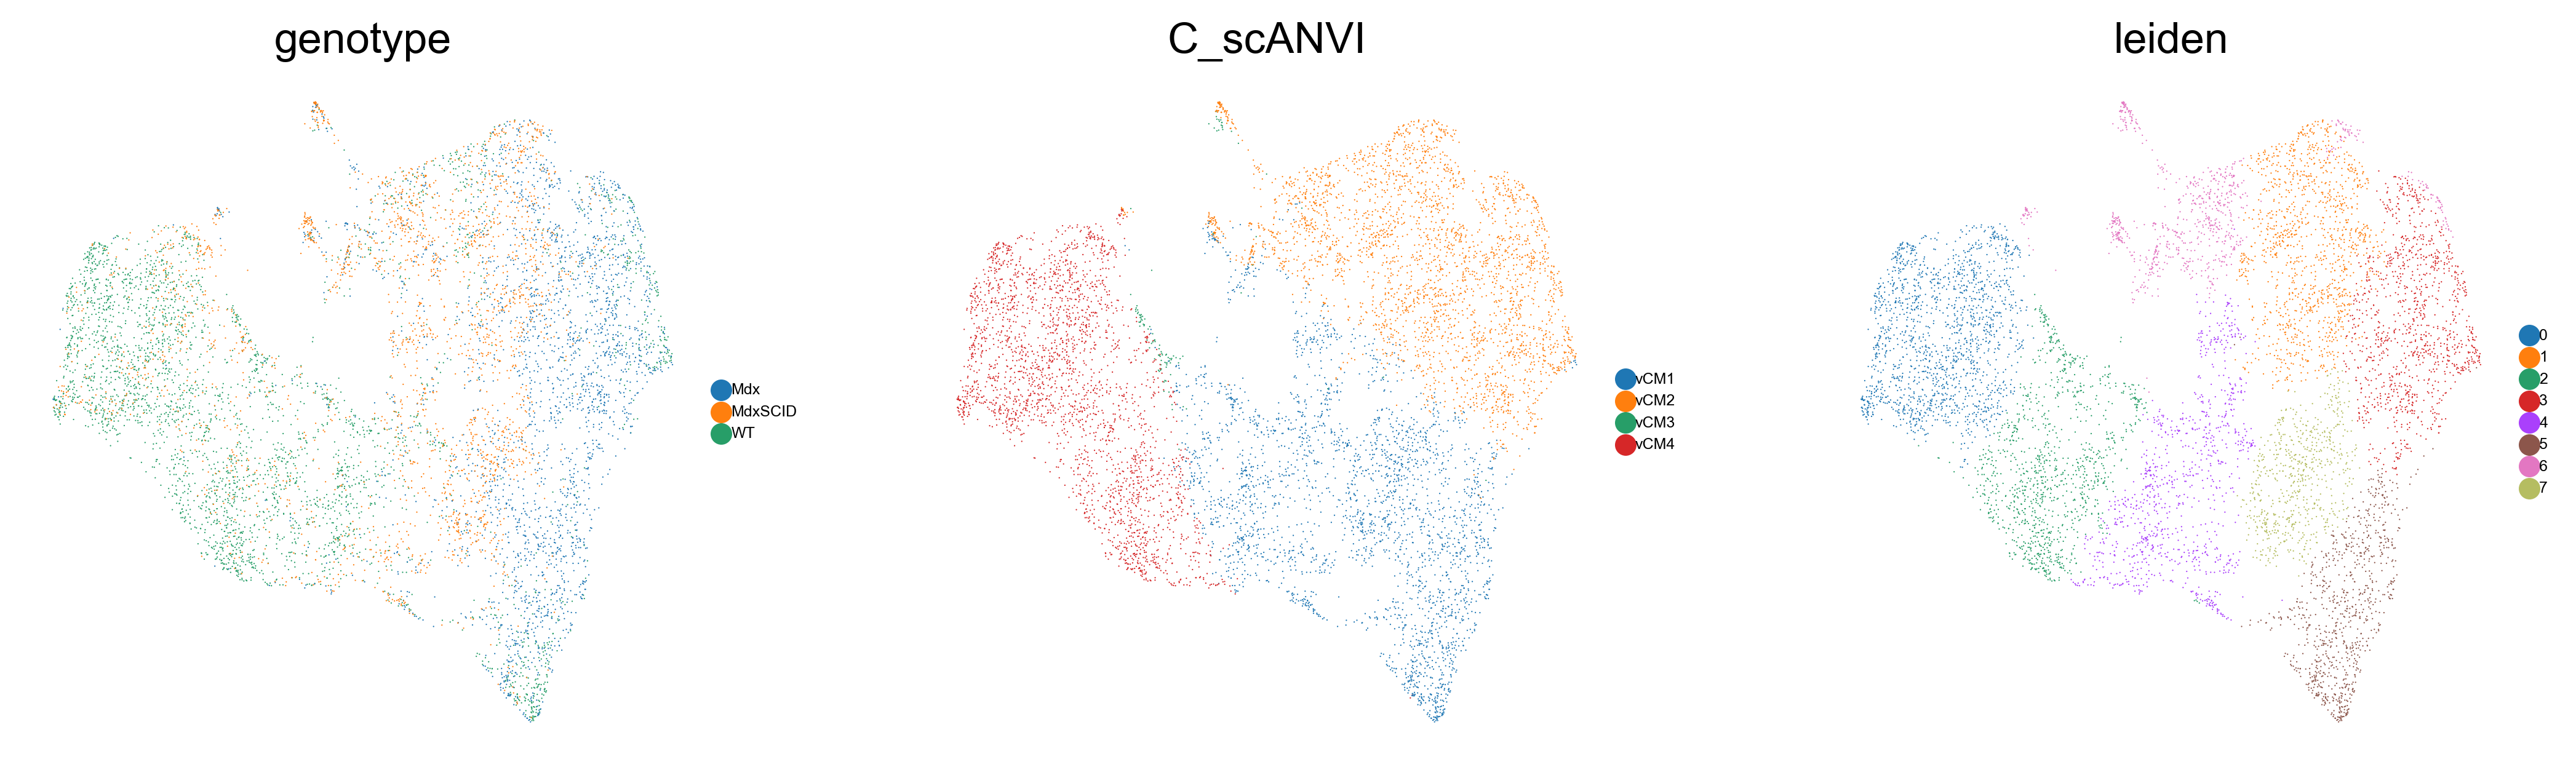

In [5]:
sc.pp.neighbors(adata, use_rep = "X_scANVI", n_neighbors = 50, metric = 'minkowski')
sc.tl.leiden(adata, resolution = 0.4, random_state = 1712)
sc.pl.umap(adata, frameon = False, color = ['genotype', 'C_scANVI', 'leiden'], size = 0.8, legend_fontsize = 5, ncols = 3)

### Evaluate clustering accuracy with `SCCAF`

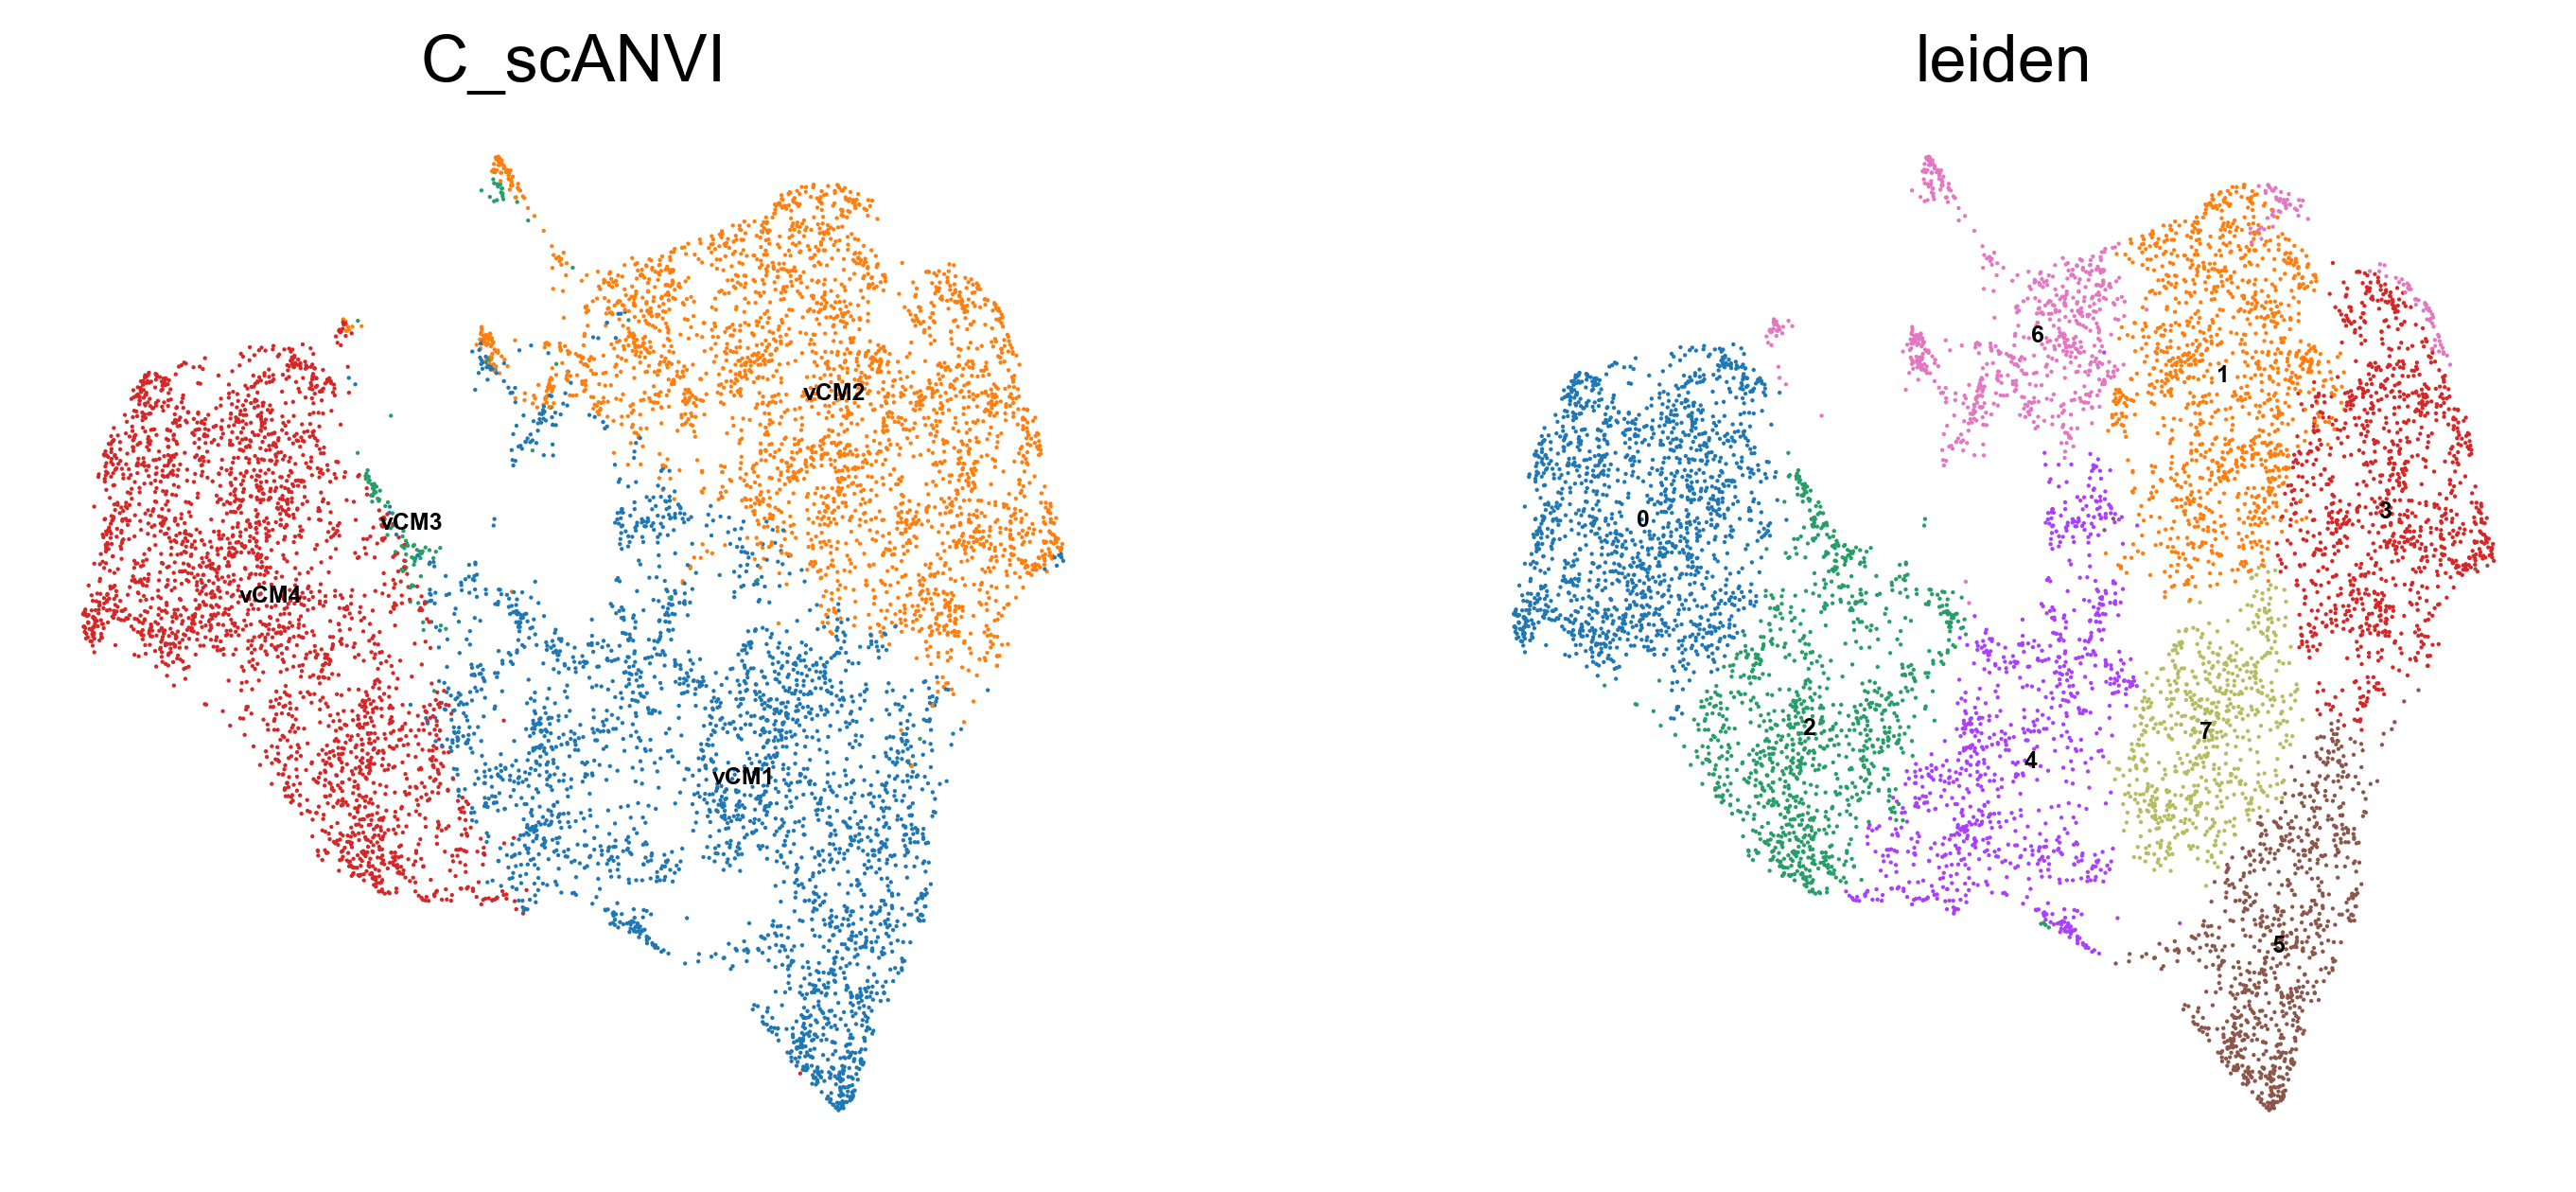

In [6]:
sc.pl.umap(adata, frameon = False, color = ['C_scANVI', 'leiden'], size = 3, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

In [ ]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata.X, adata.obs['leiden'], n = 100)

In [ ]:
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

In [ ]:
adata

### Rename cluster based on the cell type annotation

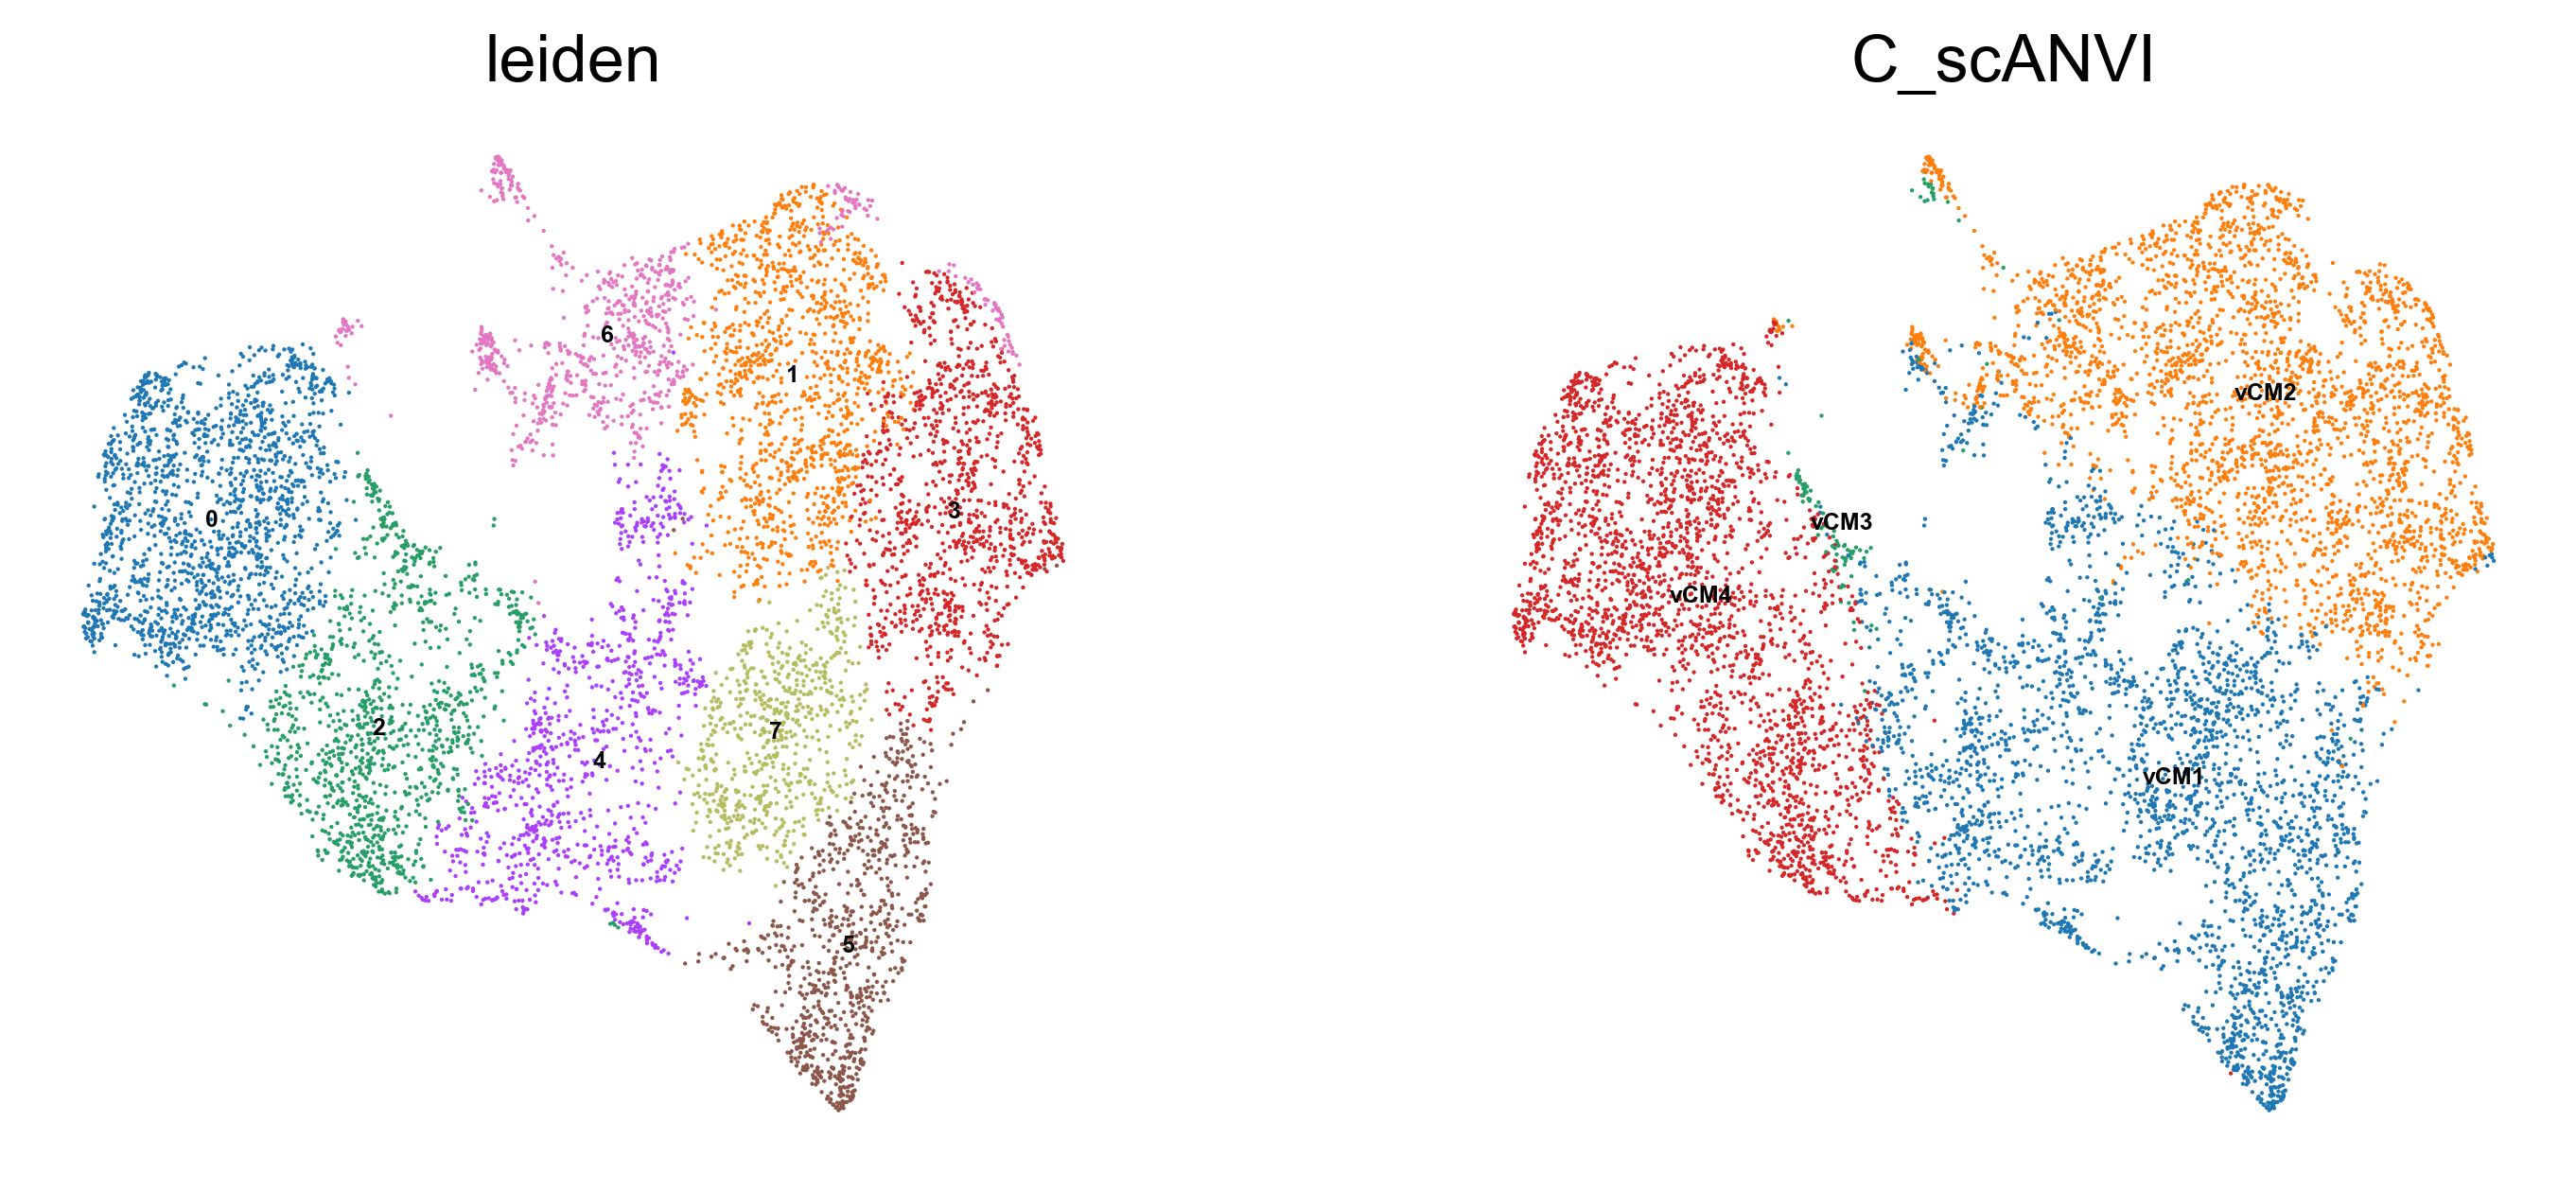

In [9]:
sc.pl.umap(adata, frameon = False, color = ['leiden', 'C_scANVI'], size = 3, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

In [10]:
adata.obs['leiden'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

### Calculate cluster-specific marker genes using _Wilcoxon's Rank Sum Test_ per condition

In [17]:
adata

AnnData object with n_obs × n_vars = 8257 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors', 'genotype_colors', 'C_scANVI_colors', 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [14]:
adata.obs['genotype'].cat.categories

Index(['Mdx', 'MdxSCID', 'WT'], dtype='object')

In [28]:
genotype = adata[adata.obs['genotype'].isin(['MdxSCID'])] 
genotype

View of AnnData object with n_obs × n_vars = 2329 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors', 'genotype_colors', 'C_scANVI_colors', 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [29]:
adata_log = genotype.copy()
adata_log

AnnData object with n_obs × n_vars = 2329 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors', 'genotype_colors', 'C_scANVI_colors', 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [30]:
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)


In [31]:
sc.tl.rank_genes_groups(adata_log, 'C_scANVI', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = adata_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


vCM1_n    vCM1_l         vCM1_p    vCM2_n    vCM2_l        vCM2_p  \
0           Airn  1.995551  5.347966e-118   Gm31013  3.504150  2.429071e-30   
1  D830005e20rik  1.959284  5.347966e-118      Tex2  3.345376  8.893556e-28   
2          Rbm20  1.808319  4.801687e-112   Fam214a  3.826563  5.517031e-27   
3          Esrrg  1.845510  8.256287e-110      Atrn  3.382982  2.837151e-26   
4         Ctnna3  1.748539  1.056930e-108      Wnk2  3.582506  4.526370e-26   
5          Palld  1.767217  5.116293e-107     Nars2  3.208050  5.074830e-26   
6         Luc7l2  1.718702  1.402968e-105     Lrrc1  3.253031  1.189669e-25   
7           Mhrt  1.860370  2.859345e-105  Baiap2l1  3.317149  1.249474e-25   
8          Cpeb3  1.818849  2.859345e-105   Ppfibp2  3.226362  1.998949e-25   
9          Erbb4  1.839165  4.286139e-105   Adamts6  3.501339  3.438811e-25   

     vCM3_n    vCM3_l    vCM3_p   vCM4_n    vCM4_l         vCM4_p  
0    Slc9a9  5.250097  0.012392  Mt-cytb  1.792275  1.659276e-234  
1     Ptprc  6.205470  0.018804   Mt-nd1  1.797194  1.659276e-234  
2  Arhgap15  6.107465  0.034196   Mt-nd4  1.771523  1.659276e-234  
3      Pid1  5.319763  0.034196  Mt-atp6  1.747960  1.671230e-234  
4      Cmip  5.997050  0.064673   Mt-nd3  2.120203  2.612968e-234  
5      Fli1  5.216958  0.074017   Mt-co1  1.728017  2.843600e-234  
6     Myo1f  6.451016  0.094572   Mt-co3  1.718967  2.921734e-234  
7     Mbnl1  0.702541  0.120769   Mt-co2  1.740978  3.182365e-234  
8     F13a1  5.242879  0.120769   Mt-nd2  1.785391  3.592707e-234  
9     Myo5a  3.822398  0.120769  Gm42418  1.693157  2.184927e-233

In [32]:
wilcox_markers.to_csv('/Users/cartalop/github/hofmann_macro/data/Mouse_DMD_MdxSCID_CMC-CellTypes_ctl240714_WilcoxRST_markers.csv', sep = ',', index = False)

### Export annotated object

In [ ]:
adata

In [ ]:
adata.write('../data/heart_mm_nuclei-23-0092_scANVI-leiden_types_ctl231127.raw.h5ad')